# Вычисление объёма

Задача - вычислить объём такой вещи: $(\frac{x^2}{a^2}+\frac{y^2}{b^2})^2 +\frac{z^4}{c^4} \leqslant \frac{z}{p}$. Для начала, параметризуем и посмотрим, что это такое.

In [2]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact 
@interact
def f(a: (0,50), b: (0,50),c: (0,50),p: (0,50)):
    ax = axes3d.Axes3D(plt.figure())
    u = np.linspace(0, 2*np.pi, 50)
    v = np.linspace(0, np.pi, 50)
    r = (p*np.outer(np.ones(np.size(u)), (np.sin(v))**0.5)/p)**(1/3)
    x = a*r*np.outer(np.cos(u),(np.cos(v))**0.5)
    y = b*r*np.outer(np.sin(u),(np.cos(v))**0.5)
    z = c*r*np.outer(np.ones(np.size(u)),(np.sin(v))**0.5)
    
    ax.plot_wireframe(x,y,z, rstride=1, cstride=1, color = 'blue', alpha = 0.5)

interactive(children=(IntSlider(value=25, description='a', max=50), IntSlider(value=25, description='b', max=5…

Воспользуемся методом Монте-Карло.

In [3]:
def inside(x, y, z, a, b, c, p):
    return (x**2/a**2 + y**2/b**2)**2 + z**4/c**4 <= z/p
n=100000000
k=10
a,b,c,p = 2,3,4,5
rndm = np.random.RandomState(123)
x1,y1, z1 = rndm.uniform(0, k, size=(3,n))
m = inside(x1,y1,z1,a,b,c,p)
count = np.count_nonzero(m)
res = count*k**3/n        
print(res)

7.89854


Теперь построим точки, попавшие внутрь, и саму фигуру (на втором графике было плохо видно точки, поэтому пришлось сделать другой, но зато на нём видно, что x, y и z > 0

<IPython.core.display.Javascript object>


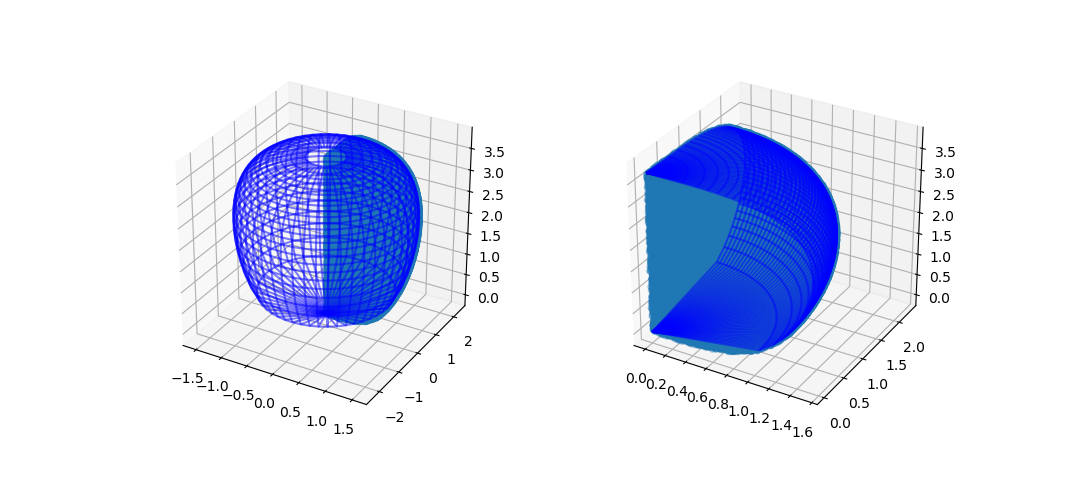

C:\Users\Tom\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
C:\Users\Tom\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


In [4]:
fig = plt.figure(figsize=plt.figaspect(0.45))
ax = fig.add_subplot(1, 2, 1, projection='3d')
u = np.linspace(0, 2*np.pi, 50)
v = np.linspace(0, np.pi, 50)
r = (c*np.outer(np.ones(np.size(u)), (np.sin(v))**0.5)/p)**(1/3)
x = a*r*np.outer(np.cos(u),(np.cos(v))**0.5)
y = b*r*np.outer(np.sin(u),(np.cos(v))**0.5)
z = c*r*np.outer(np.ones(np.size(u)),(np.sin(v))**0.5)
ax.plot_wireframe(x,y,z, rstride=1, cstride=1, color = 'blue', alpha = 0.5)


ax.scatter(x1[m], y1[m], z1[m], alpha = 0.3)
ax = fig.add_subplot(1, 2, 2, projection='3d')

u = np.linspace(0, np.pi/2, 50)
v = np.linspace(0, np.pi/2, 50)
r = (c*np.outer(np.ones(np.size(u)), (np.sin(v))**0.5)/p)**(1/3)
x = a*r*np.outer(np.cos(u),(np.cos(v))**0.5)
y = b*r*np.outer(np.sin(u),(np.cos(v))**0.5)
z = c*r*np.outer(np.ones(np.size(u)),(np.sin(v))**0.5)
ax.plot_wireframe(x,y,z, rstride=1, cstride=1, color = 'blue', alpha = 0.5)


ax.scatter(x1[m], y1[m], z1[m], alpha = 0.3)
plt.show()